<a id='top'></a>

# CSCI 3202: Intro to AI - Fall 2020 Practicum 1
***

This practicum is due on Canvas by **11:59 PM on Monday November 2**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distributions or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.  We will happily discuss ideas on your paper, however.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**:  Qiuyang Fu

***


**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. The practicum is designed to be completed using only the packages in the first given code cell.
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Short Paper](#p2) | [Bottom](#bot)

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

## [50 points] Part 1: The Traveling Salesman

Run the following cell to generate the data set, which is saved in the `df` dataframe by default.  You may change it to a dictionary/matrix/whatever typing you see fit.  The x and y axis are in miles, and you may assume that any pairwise distances computed are Euclidean distance

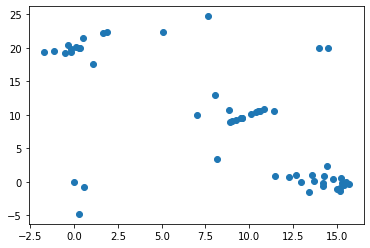

In [2]:
np.random.seed(3202)

d=np.random.multivariate_normal([14,0], [[1,0],[0,1]],20)
d2=np.random.multivariate_normal([0,20], [[1,.8],[.8,1]],12)
d3=np.random.multivariate_normal([10,10], [[1,1],[1,1]],12)
d4=[[14,20], [0,0], [7,10]]
d5={'x': np.random.random(size=10)*(20)-3, 'y': np.random.random(size=10)*30-5}
df=pd.DataFrame(data=d, columns=['x','y'])
df = df.append(pd.DataFrame(data=d2, columns=['x','y']))
df = df.append(pd.DataFrame(data=d3, columns=['x','y']))
df = df.append(pd.DataFrame(data=d4, columns=['x','y']))
df = df.append(pd.DataFrame(data=d5, columns=['x','y']))
plt.scatter(df['x'],df['y'])

### Part A) Warmup: Rehash on A*

Turn the set of points into a graph by adding edges.  For each point, add two edges that connect that point two the nearest two other points.  Note that some points might end up with more than 3 edges, but many edges won't have to be added because nearest-other-points will often be symmetric.  After doing this, perform the $A^*$ algorithm to find the shortest path from the point at (0,0) to the point at (14,20).  Print out the path followed (as a list of coordinate pairs) and the total Euclidean distance.

Note: you probably want:
    - i) a quick function or dictionary or matrix that stores or computes the distances between two input points
    - ii) a function that computes the total distance of a path: given a list of nodes/vertices, uses the i) function to compute it's total edge cost

In [3]:
class A_star:
  
    def __init__(self, coords):
        """
        adds nodes, edges based on heuristic = Euclidean distance
        create edge dictionary- with A star distances with the help of fitness function  
        """
        self.coords = coords
        self.N = len(coords)      

        self.nodes = [i for i in range(self.N)]

        self.best_solution = None
        self.best_fitness = float("Inf")
        self.fitness_list = []

    #create path function?
    def heuristic_dist(self, node_0, node_1):
        """
        Euclidean distance- which is usewd as heuristic dist in A star - between two nodes.
        """
        coord_0, coord_1 = self.coords[node_0], self.coords[node_1]
        return ((coord_0[0] - coord_1[0]) ** 2 + (coord_0[1] - coord_1[1]) ** 2)**0.5

    #do A*
    def Astar_initial_solution(self):
        """
        Greedy algorithm to get an initial solution (closest-neighbour).
        """
        cur_node = np.random.choice(self.nodes)  # start from a random node
        solution = [cur_node]

        free_nodes = set(self.nodes)
        free_nodes.remove(cur_node)
        while free_nodes:
            next_node = min(free_nodes, key=lambda x: self.heuristic_dist(cur_node, x))  # nearest neighbour
            free_nodes.remove(next_node)
            solution.append(next_node)
            cur_node = next_node

        cur_fit = self.fitness(solution)
        if cur_fit < self.best_fitness:  # If best found so far, update best fitness
            self.best_fitness = cur_fit
            self.best_solution = solution
        self.fitness_list.append(cur_fit)
        return solution, cur_fit

    def fitness(self, solution):
        """
        Total distance of the current solution path.
        """
        cur_fit = 0
        for i in range(self.N):
            cur_fit += self.heuristic_dist(solution[i % self.N], solution[(i + 1) % self.N])
        return cur_fit

# testing A star 
coords = df.values.tolist()    
a_star_obj = A_star(coords)
sol, cur_fit_obj = a_star_obj.Astar_initial_solution()

# printing path
print("The path is: ")
for node_i in sol:
  print(str(node_i) + " : "  + str(coords[node_i]) + " -> ", end = " ")
print()

# Evaluating Cost
print("The total edge cost given by A star is: " + str(cur_fit_obj))

The path is: 
48 : [8.816789737248161, 10.69371097672006] ->  33 : [9.592412507130083, 9.592412507130083] ->  35 : [9.573996163218304, 9.573996163218304] ->  34 : [9.536150716444128, 9.536150716444128] ->  43 : [9.532434833676634, 9.532434833676634] ->  36 : [9.240213724439549, 9.240213724439549] ->  41 : [9.044187581291435, 9.044187581291435] ->  42 : [8.92780763709286, 8.927807637092862] ->  37 : [10.089271640004739, 10.089271640004739] ->  40 : [10.365579121103146, 10.365579121103146] ->  39 : [10.519497157642629, 10.519497157642629] ->  32 : [10.621876523413203, 10.621876523413203] ->  38 : [10.818885266013622, 10.818885266013622] ->  47 : [11.437427961056555, 10.541948409946741] ->  49 : [8.044174668117513, 12.949819387468512] ->  46 : [7.0, 10.0] ->  50 : [8.155008121002396, 3.4024185234070607] ->  6 : [11.458258660109315, 0.9314620492290537] ->  8 : [12.28070813957457, 0.7757160957876456] ->  0 : [12.66805621018173, 1.0070643301216815] ->  10 : [13.564272567082183, 0.97078534774

### Part B) Annealing: the Salesman

In this exercise, we're going to be using simulated annealing to find solutions to the traveling salesman problem.Your two helper functions in part A should help!

In this problem, we model a salesman that tries to "reach" each city on the graph to sell their wares.  As an algorithm, the goal of the traveling salesman problem is to find the path that:
    - has the lowest total edge length (or path cost)
    - hits each and every vertex/node exactly once
    - the salesman may travel directly between *any* two cities (you will need more edges than you constructed in part A!)

We will use simulated annealing.  This means you need to come up with both a temperature function and a probability of acceptance function.  There is no guidance on these functions beyond:
    - Given a path or solution to the problem, the temperature function proposes a new solution.
    The new solutions should become more and more like the input solutions over time/as you run more iterations
    - Given two solutions, the annealing algorithm will always accept one with a shorter path cost, and will have some probability that scales with temperature/iterations and becomes less and less likely to accept a new solution with longer path cost.
    - All proposed solutions should pass through every node.
    - There are many methods to "adjust" old solutions to propose new ones.  You should consider moving a single node to another location in the list, moving entire substrings to other locations, reversing the order of substrings, etc.
    
For any temperature/probability function pair, make sure you run annealing for sufficiently different initial conditions to generate a small sample of "final solution lengths" and "number of iterations."

Typeset and describe in exact detail how you chose and implemented temperature and probability functions in the markdown cell below.


# Implementation Details:
Inspired by the phenomena of cooling changing the properties of melted solids, a similar, distance hampering & thus the calculated, rule based randomization of the node selection process deciding the final path is obtained by following:
- ## Background on A* :
  - As seen in A star implementation above, the Euclidean cost function can be taken as heuristic function for the algorithm to find the shortest path, this helped while deciding/ selecting the next node based on heuristic + cost_so_far (here, estimated via fitness funtion/method to keep it aligned & reusable with the annealing process).
# Simulated Annealing:
- The approach used i.e. Simulated annealing chooses a random move from the neighbourhood unlike hill climbing which chooses the best move from all those available – at least when using steepest descent (or ascent).
In case the move is better than its current position then simulated annealing will always take it. If the move is worse (i.e. lesser quality) then it will be accepted based on some probability. 
-  Steps folowed are:
  - Function SIMULATED-ANNEALING(Problem, Schedule) returns a solution state
  - Inputs	:	Problem, a problem, Schedule, a mapping from time to temperature (fitness function)
  - Local Variables	:	Current, a node
		Next, a node
		T, a “temperature” controlling the probability of downward steps

  - Current = MAKE-NODE(INITIAL-STATE[Problem]) : __init__ <br>
  - For t = 1 to N  (No. of nodes/points)  do
  - T = Schedule[t]
  - If T = 0 then return Current
  - Next = a randomly selected successor of Current
  - PE = VALUE[Next] – VALUE[Current]
  - if PE > 0 then Current = Next
  - else Current = Next only with probability exp obtained from p_accept Function 
	

### Part C) Annealing Implementation

In [4]:
## Code cell: implement annealing!  Include any trial runs for different temperature/prob functions. 
class SimAnneal(object):
    def __init__(self, coords, T=-1, alpha=-1, stopping_T=-1, stopping_iter=-1):
        self.coords = coords
        self.N = len(coords)
        self.T = (self.N)**0.5 if T == -1 else T
        self.T_save = self.T  # save inital T to reset if batch annealing is used
        self.alpha = 0.995 if alpha == -1 else alpha
        self.stopping_temperature = 1e-8 if stopping_T == -1 else stopping_T
        self.stopping_iter = 100000 if stopping_iter == -1 else stopping_iter
        self.iteration = 1

        self.nodes = [i for i in range(self.N)]

        self.best_solution = None
        self.best_fitness = float("Inf")
        self.fitness_list = []

    def initial_solution(self):
        """
        Greedy algorithm - just like A star - to get an initial solution based on closest-neighbour.
        """
        cur_node = np.random.choice(self.nodes)  # start from a random node
        solution = [cur_node]

        free_nodes = set(self.nodes)
        free_nodes.remove(cur_node)
        while free_nodes:
            next_node = min(free_nodes, key=lambda x: self.heuristic_dist(cur_node, x))  # nearest neighbour
            free_nodes.remove(next_node)
            solution.append(next_node)
            cur_node = next_node

        cur_fit = self.fitness(solution)
        if cur_fit < self.best_fitness:  # If best found so far, update best fitness
            self.best_fitness = cur_fit
            self.best_solution = solution
        self.fitness_list.append(cur_fit)
        return solution, cur_fit

    def heuristic_dist(self, node_0, node_1):
        """
        Euclidean distance between two nodes.
        """
        coord_0, coord_1 = self.coords[node_0], self.coords[node_1]
        return ((coord_0[0] - coord_1[0]) ** 2 + (coord_0[1] - coord_1[1]) ** 2)**0.5

    def fitness(self, solution):
        """
        Total distance of the current solution path.
        """
        cur_fit = 0
        for i in range(self.N):
            cur_fit += self.heuristic_dist(solution[i % self.N], solution[(i + 1) % self.N])
        return cur_fit

    def p_accept(self, candidate_fitness):
        """
        Probability of accepting if the candidate is worse than current.
        Depends on the current temperature and difference between candidate and current.
        """
        return 2.71828**(-abs(candidate_fitness - self.cur_fitness) / self.T)
        # return math.exp(-abs(candidate_fitness - self.cur_fitness) / self.T) # not used as other libraries not allowed

    def accept(self, candidate):
        """
        Accept with probability 1 if candidate is better than current.
        Accept with probabilty p_accept(..) if candidate is worse.
        """
        candidate_fitness = self.fitness(candidate)
        if candidate_fitness < self.cur_fitness:
            self.cur_fitness, self.cur_solution = candidate_fitness, candidate
            if candidate_fitness < self.best_fitness:
                self.best_fitness, self.best_solution = candidate_fitness, candidate
        else:
            if np.random.random() < self.p_accept(candidate_fitness):
                self.cur_fitness, self.cur_solution = candidate_fitness, candidate

    def anneal(self):
        """
        Execute simulated annealing algorithm.
        """
        # Initialize with the greedy solution.
        self.cur_solution, self.cur_fitness = self.initial_solution()

        print("Starting annealing.")
        while self.T >= self.stopping_temperature and self.iteration < self.stopping_iter:
            candidate = list(self.cur_solution)
            l = np.random.randint(2, self.N - 1)
            i = np.random.randint(0, self.N - l)
            candidate[i : (i + l)] = reversed(candidate[i : (i + l)])
            self.accept(candidate)
            self.T *= self.alpha
            self.iteration += 1

            self.fitness_list.append(self.cur_fitness)

        print("Best fitness obtained: ", self.best_fitness)
        improvement = 100 * (self.fitness_list[0] - self.best_fitness) / (self.fitness_list[0])
        print(f"Improvement over greedy heuristic: {improvement : .2f}%")

    def batch_anneal(self, times=10):
        """
        Execute simulated annealing algorithm `times` times, with random initial solutions.
        """
        for i in range(1, times + 1):
            print(f"Iteration {i}/{times} -------------------------------")
            self.T = self.T_save
            self.iteration = 1
            self.cur_solution, self.cur_fitness = self.initial_solution()
            self.anneal()

    def visualize_routes(self):
        """
        Visualize the TSP route with matplotlib.
        """
        visualize_path([self.best_solution], self.coords)

    def plot_learning(self):
        """
        Plot the fitness through iterations.
        """
        plt.plot([i for i in range(len(self.fitness_list))], self.fitness_list)
        plt.ylabel("Fitness")
        plt.xlabel("Iteration")
        plt.show()



## Demo Run

sa = SimAnneal(coords, stopping_iter=5000)
sa.anneal()

Starting annealing.
Best fitness obtained:  109.79625283436872
Improvement over greedy heuristic:  11.90%


### Part D) Conclusions
Create a visualization - box plots, line graphs, histograms, etc. of how your temperature/probability functions performed. Which one did best?  Plot the path corresponding to the shortest edge length that you found, and state its path length.  How many iterations were necessary *on average* for the temperature/probability pair that gave you your shortest edge length?

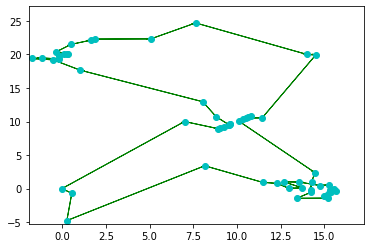

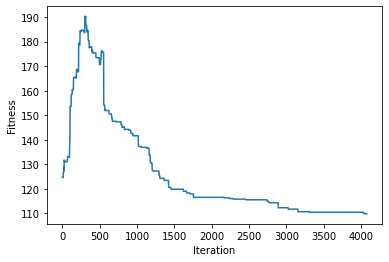

In [5]:
#visualization of success times/paths of different implementations, plot of shortest path found

def visualize_path(paths, points, num_iters=1):

    """
    path: List of lists with the different orders in which the nodes are visited
    points: coordinates for the different nodes
    num_iters: number of paths that are in the path list
    """

    # Unpack the primary TSP path and transform it into a list of ordered
    # coordinates

    x = []; y = []
    for i in paths[0]:
        x.append(points[i][0])
        y.append(points[i][1])

    plt.plot(x, y, 'co')

    # Set a scale for the arrow heads (there should be a reasonable default for this, WTF?)
    a_scale = float(max(x))/float(100)

    # Draw the older paths, if provided
    if num_iters > 1:

        for i in range(1, num_iters):

            # Transform the old paths into a list of coordinates
            xi = []; yi = [];
            for j in paths[i]:
                xi.append(points[j][0])
                yi.append(points[j][1])

            plt.arrow(xi[-1], yi[-1], (xi[0] - xi[-1]), (yi[0] - yi[-1]),
                    head_width = a_scale, color = 'r',
                    length_includes_head = True, ls = 'dashed',
                    width = 0.001/float(num_iters))
            for i in range(0, len(x) - 1):
                plt.arrow(xi[i], yi[i], (xi[i+1] - xi[i]), (yi[i+1] - yi[i]),
                        head_width = a_scale, color = 'r', length_includes_head = True,
                        ls = 'dashed', width = 0.001/float(num_iters))

    # Draw the primary path for the TSP problem
    plt.arrow(x[-1], y[-1], (x[0] - x[-1]), (y[0] - y[-1]), head_width = a_scale,
            color ='g', length_includes_head=True)
    for i in range(0,len(x)-1):
        plt.arrow(x[i], y[i], (x[i+1] - x[i]), (y[i+1] - y[i]), head_width = a_scale,
                color = 'g', length_includes_head = True)

    #Set axis too slitghtly larger than the set of x and y
    plt.xlim(min(x)*1.1, max(x)*1.1)
    plt.ylim(min(y)*1.1, max(y)*1.1)
    plt.show()

## tsp plot
sa.visualize_routes()
sa.plot_learning()

[Paste link to Mark down here](https://)
- On demo-runs of SA i.e. Simulated -annealing, we observe that as the number of iterations increases the estimated cost becomes more accurate & faster. (Could be observed by changing stopping_iter parameter as shown below)

- ## Demo Run
sa = SimAnneal(coords, stopping_iter=3000) # change number of iterations here
sa.anneal()

- ## tsp plot
sa.visualize_routes()
sa.plot_learning()

### Part E) Short Bonus (5 pts)

Suppose there existed a river that was very difficult to cross running along the line $x=10$ on the data set.  Adjust your edge costs so that any edge that cross this river has an added incurred cost equivalent to traveling an *additional* 10 miles.  Use your winning algorithm in Parts C/D to solve ths problem again, and as before plot the shortest path found and list its cost (distance plus any river crossings).

In [6]:
# We can easily adapt to the changing needs as one given above : like a river stream appears at x = 10, which causes cost to be increased by additional 10 miles
def heuristic_dist(self, node_0, node_1):
        """
        Returns Euclidean distance between two nodes.
        """
        coord_0, coord_1 = self.coords[node_0], self.coords[node_1]
        dist = ((coord_0[0] - coord_1[0]) ** 2 + (coord_0[1] - coord_1[1]) ** 2)**0.5 
        return dist+10 if (coord_0[0] > 10 or coord_1[0] > 10) else dist

<br>

---
[Back to top](#top)
<a id='p2'></a>

## [50 points] Part 2: A Short Paper on Ethics and AI

Your task is to find a current event, project, or issue that relates to AI, and evaluate the ethics involved. You
must consider multiple points of view, not just your own as well as the implications that come from these points of
view.

We mentioned various ethical scenarios in class that can help you to consider your analysis. Remember in much of AI,
context is king. This can be the case in ethics also.  You may want to think about e.g. describing the types of competing loss/utility evaluations that might lead to different AI actions in the issue you choose.  You should also read about the 5 pillars of ethical standards here: https://www.scu.edu/ethics/ethics-resources/ethical-decision-making/a-framework-for-ethical-decision-making/

Consider the effects and impacts of AI on everyday life. Some examples to consider:
- AI and Justice
- AI and Medicine
- AI and Civil Rights
- AI and Warfare
- Defining AI
- AI Regulation
- AI and Human Jobs
- AI and Privacy
- Fair AI
- AI and Misinformation

You are welcome to discuss another topic providing there is enough AI content to make it relevant.

Paper in this cell *here*

Citations/bibliography *here*.  Alternatively, you may submit the paper to canvas as a .pdf.

## Technical Details

Your paper should be approximately 1000 - 1500 words.

You will then need to collect sources surrounding this scenario. These can be newspaper articles, blog posts, book chapters etc. It is always good to have more than one source, now more than ever. You are free to choose your topic around what interests you, but I recommend that you read the grading rubric
below before making a final choice. Make sure you choose a topic on which you can write a paper to earn maximum
points.

I expect this assignment to use references appropriately and all references should be in the ACM Format (see:https://www.acm.org/publications/authors/reference-formatting).

For your consideration: preliminary rubric

- (a) [10 pts] Summarize your scenario. What is the problem that is being solved and what is the method used to solve it. This should include references to where you read about it. There maybe multiple articles on the same topic saying different things, you may wish to discuss both.
- (b) [6 pts] Describe the AI involved. Why was AI the solution? Is there a human solution? If so, why was the AI solution used.
- (c) [14 pts] Discuss the Ethical considerations of this scenario. If there is more than one side to the argument you should consider them all. (For almost all studies there will be multiple viewpoints). I recommend using the moral frameworks discussed in class to break down the scenario, either through analysing Moral Intensity of the five aspects of the Markkula Framework.
- (d) [6 pts] Discuss the Implications of this case study. How do the actions taken impact the future? What ethical debate can you forsee in the future?
- (e) [6 pts] Discuss how this case study relates to Ethics in AI as a whole. Is this case study representative? atypical? Somewhere in the middle? Why?
- (f) [4 pts] Conclude your paper, there should be a take home message. If you wish to include a personal opinion, this is the section in which to do that
There will also be points for:
- (g) [2 pt] Presentation, Spelling and Grammar
- (h) [2 pt] Appropriate Referencing

<br>

---
[Back to top](#top)
<a id='bot'></a>